# Chapter4. 전처리

## 이상치 확인

1. IQR(Inter Quantile Range)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'Class_0',1:'Class_1',2:'Class_2'})
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,Class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,Class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,Class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,Class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,Class_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,Class_2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,Class_2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,Class_2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,Class_2


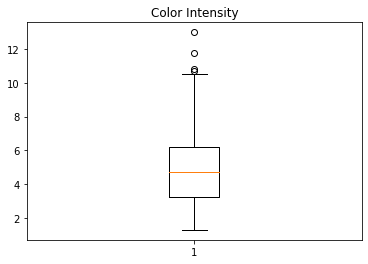

In [7]:
plt.boxplot(wine['color_intensity'], whis=1.5)
plt.title('Color Intensity')
plt.show()

In [11]:
import numpy as np
def outliers_iqr(df, col):
    Q1,Q3 = np.percentile(df[col], [25,75])
    iqr = Q3 - Q1
    lower_whis = Q1 - (iqr * 1.5)
    upper_whis = Q3 + (iqr * 1.5)
    outliers = df[(df[col] > upper_whis) | (df[col] < lower_whis)]
    return outliers
outliers = outliers_iqr(wine,'color_intensity')
outliers.index

Int64Index([151, 158, 159, 166], dtype='int64')

In [14]:
# 이상치 변경
## outlier를 NAN으로 변환 후 평균값으로 치환
wine.loc[outliers.index, 'color_intensity'] = np.nan

wine['color_intensity'].fillna(wine['color_intensity'].mean(), inplace=True)
wine.loc[outliers.index, 'color_intensity'] 

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

# 데이터 분할

In [17]:
wine.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Class'],
      dtype='object')

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test, Y_train,Y_test = train_test_split(wine.drop(columns = ['Class']), wine['Class'], test_size=0.2, random_state=123, stratify=wine['Class'])

In [24]:
Y_train.value_counts()

Class_1    57
Class_0    47
Class_2    38
Name: Class, dtype: int64

In [25]:
Y_test.value_counts()

Class_1    14
Class_0    12
Class_2    10
Name: Class, dtype: int64

# 데이터 스케일링

## Standard Scaler

In [29]:
from sklearn.preprocessing import StandardScaler

StdScaler = StandardScaler()

# Train으로 스케일러 학습
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)


# Test 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과물 비교
print("\t\t(min, max) (mean, std)")
print("Train Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))




		(min, max) (mean, std)
Train Scaled (-3.50, 4.36) (0.00, 1.00)
Test Scaled (-2.47, 3.40) (0.06, 0.98)


## MinMax Scaler

In [30]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax.fit(X_train)
X_train_sc = minmax.transform(X_train)

# Test 스케일링
X_test_sc = minmax.transform(X_test)

# 결과물 비교
print("\t\t(min, max) (mean, std)")
print("Train Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


		(min, max) (mean, std)
Train Scaled (0.00, 1.00) (0.42, 0.23)
Test Scaled (-0.12, 1.27) (0.43, 0.23)


## Max Abs Scaler

In [31]:
from sklearn.preprocessing import MaxAbsScaler
MaxAbs = MaxAbsScaler()

MaxAbs.fit(X_train)
X_train_sc = MaxAbs.transform(X_train)


# Test 스케일링
X_test_sc = MaxAbs.transform(X_test)

# 결과물 비교
print("\t\t(min, max) (mean, std)")
print("Train Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


		(min, max) (mean, std)
Train Scaled (0.07, 1.00) (0.58, 0.21)
Test Scaled (0.09, 1.18) (0.58, 0.21)


## Robust Scaler

In [33]:
from sklearn.preprocessing import RobustScaler
Robust = RobustScaler()

Robust.fit(X_train)
X_train_sc = Robust.transform(X_train)


# Test 스케일링
X_test_sc = Robust.transform(X_test)

# 결과물 비교
print("\t\t(min, max) (mean, std)")
print("Train Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_train_sc.min(), X_train_sc.max(), X_train_sc.mean(), X_train_sc.std()))
print("Test Scaled (%.2f, %.2f) (%.2f, %.2f)"%(X_test_sc.min(), X_test_sc.max(), X_test_sc.mean(), X_test_sc.std()))


		(min, max) (mean, std)
Train Scaled (-3.25, 3.47) (0.07, 0.72)
Test Scaled (-1.60, 2.48) (0.12, 0.70)


## 월본 스케일로 변경

In [35]:
Robust.inverse_transform(X_train_sc)

array([[1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       [1.412e+01, 1.480e+00, 2.320e+00, ..., 1.170e+00, 2.820e+00,
        1.280e+03],
       [1.282e+01, 3.370e+00, 2.300e+00, ..., 7.200e-01, 1.750e+00,
        6.850e+02],
       ...,
       [1.375e+01, 1.730e+00, 2.410e+00, ..., 1.150e+00, 2.900e+00,
        1.320e+03],
       [1.410e+01, 2.020e+00, 2.400e+00, ..., 1.070e+00, 2.750e+00,
        1.060e+03],
       [1.386e+01, 1.350e+00, 2.270e+00, ..., 1.010e+00, 3.550e+00,
        1.045e+03]])

# 차원축소

## 주성분분석 PCA

주성분분석 전에 스케일링 필수

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca_fit = pca.fit(X_train_sc)

print('고유 값:',pca.singular_values_)
print('분산 설명력: ',pca.explained_variance_ratio_)

고유 값: [17.52170157 14.0434522  11.27232468  8.63032027  8.02657374]
분산 설명력:  [0.32634733 0.20964054 0.13506863 0.07917377 0.06848381]


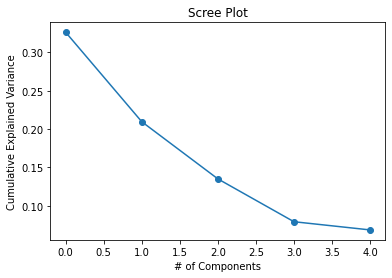

In [39]:
import matplotlib.pyplot as plt
plt.title('Scree Plot')
plt.xlabel('# of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

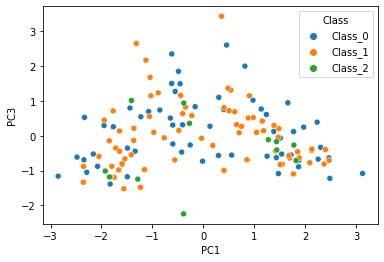

In [49]:
import seaborn as sns
pca_sc = pd.DataFrame(data = pca.fit_transform(X_train_sc), columns = ['PC1','PC2','PC3','PC4','PC5'])
sns.scatterplot(x = 'PC1', y = 'PC3',data = pca_sc, hue=wine.Class)
plt.show()

# 데이터 불균형 문제 처리

## 언더샘플링 (Under Sampling)

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# Undersamplingㅇ늘 시행할 수 있는 데이터 생성
'''
95:5의 비율로 데이터를 불균형하게 만들기
'''
x, y = make_classification(n_samples=2000, n_features=6, weights = [0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [56]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=123)
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [58]:
undersample = RandomUnderSampler(sampling_strategy= 0.3)
x_under2, y_under2 = undersample.fit_resample(x,y)
print(Counter(y_under2))

Counter({0: 333, 1: 100})


## 오버샘플링 (Oversampling)

언더샘플링보다 데이터손실이 없어 성능이 유리한 특성이 있다.

In [60]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x,y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


### Random Over Sampling

In [63]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
x_over2, y_over2 = oversample.fit_resample(x,y)
print(Counter(y_over2))

Counter({0: 1900, 1: 1900})


### SMOTE

소수 레이블을 지닌 데이터값을 K개 최근접이웃을 사용하여 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성

In [64]:
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy='minority')
x_smote, y_smote = smote_sample.fit_resample(x,y)
print(Counter(y_smote))

Counter({0: 1900, 1: 1900})


## 언더샘플링 VS 오버샘플링 VS SMOTE

/Users/xper100/opt/anaconda3/envs/orderhero/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xper100/opt/anaconda3/envs/orderhero/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/xper100/opt/anaconda3/envs/orderhero/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keywor

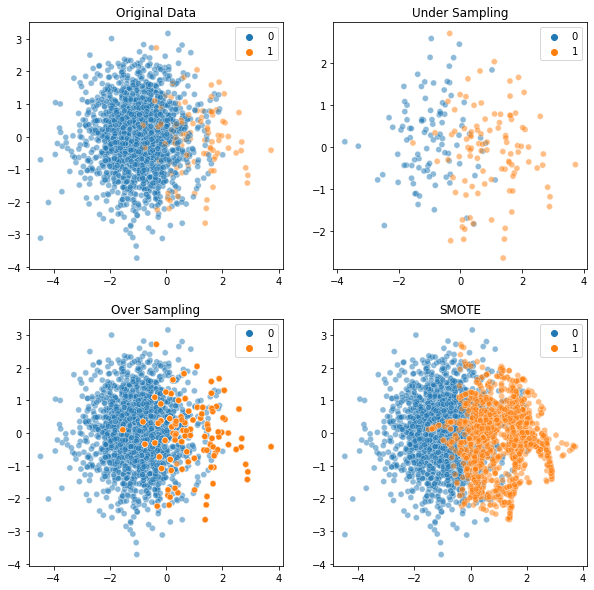

In [66]:
from matplotlib import pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (10,10))
sns.scatterplot(x[:,1], x[:,2], hue = y, ax = axes[0][0], alpha = 0.5)
sns.scatterplot(x_under[:,1], x_under[:,2] , hue = y_under, ax = axes[0][1], alpha = 0.5)
sns.scatterplot(x_over[:,1], x_over[:,2], hue = y_over, ax = axes[1][0], alpha = 0.5)
sns.scatterplot(x_smote[:,1],x_smote[:,2], hue = y_smote, ax = axes[1][1], alpha = 0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Under Sampling')
axes[1][0].set_title('Over Sampling')
axes[1][1].set_title('SMOTE')
plt.show()